<a href="https://colab.research.google.com/github/beamscource/colab_notebooks/blob/main/pytorch_nlp_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The notebook is built around the HuggingFace course (https://huggingface.co/course/chapter0/1?fw=tf) written for its transformers library with many additional theoretical and practical infos about classic and modern NLP.

Also, some additional details from Coursera's NLP specialization (https://www.coursera.org/specializations/natural-language-processing) are included.

After finishing this notebook you should be able to work with transformers library and deal with

- classifying texts (e.g., for intent recognition)
- finding names, dates, etc. in texts - classifying words within a text (entity recognition)
- searching for articles mentioning a concept (keywords search)
- question answering
- summarizing texts, translation
- generating synthetic text (NLG)

and more advanced:
- image description
- speech recognition (ASR)

You should be also be able to explain the fundamentals of modern NLP done with deep learning.

# Transformer models

**What are Transformers?**

The Transformer is a neural network model and its architecture was introduced in **June 2017** with the paper Attention is all you need (https://arxiv.org/abs/1706.03762). The focus of the original research was on translation tasks. This was followed by the introduction of several influential models, including:

**June 2018**: GPT, the first pretrained Transformer model, used for fine-tuning on various NLP tasks and obtained state-of-the-art results

**October 2018**: BERT, another large pretrained model, this one designed to produce better summaries of sentences

**February 2019**: GPT-2, an improved (and bigger) version of GPT that was not immediately publicly released due to ethical concerns

**October 2019**: DistilBERT, a distilled version of BERT that is 60% faster, 40% lighter in memory, and still retains 97% of BERT’s performance

**October 2019**: BART and T5, two large pretrained models using the same architecture as the original Transformer model (the first to do so)

**May 2020**: GPT-3, an even bigger version of GPT-2 that is able to perform well on a variety of tasks without the need for fine-tuning (called zero-shot learning)

All Transformer models have been trained as *language models*. This means they have been trained on large amounts of raw text in a *self-supervised* fashion. This is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!

This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. Therefore, the general pretrained model then goes through a process called *transfer learning*. During this process, the model is *fine-tuned* in a supervised way — that is, using human-annotated labels — on a given task.

**Pretraining and transfer learning**

*Pretraining* is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge. Pretraining can take several weeks on powerful compute infrastructures and is done on millions of texts.

*Fine-tuning*, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. Running a single training epoch on a BERT model still takes several hours.

**Transformer's architecture**

Transformer is primarily composed of two blocks:

**Encoder**: The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.

**Decoder**: The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.

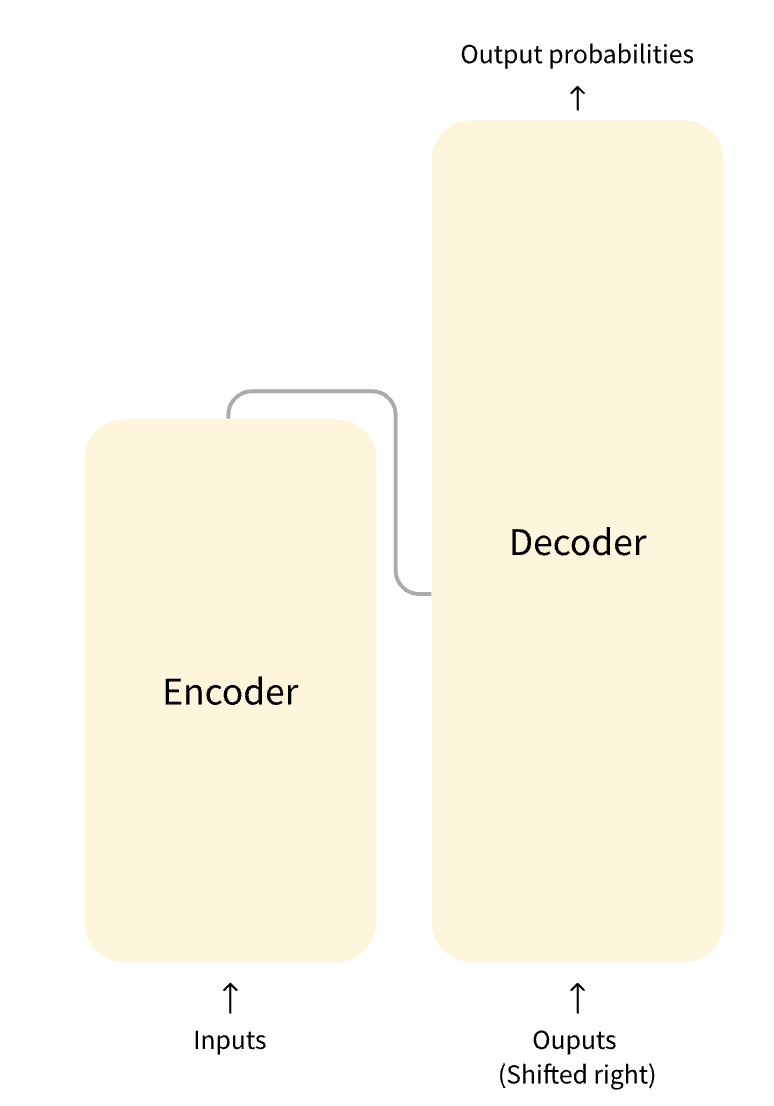

Broadly, Transformers can be grouped into three categories:

- GPT-like (also called *auto-regressive* Transformer models) - use decoder only and employed for *casual language modelling*
- BERT-like (also called *auto-encoding* Transformer models) - use encoder only and employed in *masked language modelling*
- BART/T5-like (also called *sequence-to-sequence* Transformer models) - use encoder-decoder and employed in translation and text summarization

**Reading list for Transformers**

- https://medium.com/nlplanet/two-minutes-nlp-20-learning-resources-for-transformers-1bbff88b7524

**Different Transformer architectures**

*Encoder* models use only the encoder of a Transformer model. At each stage, the attention layers can access all the words in the initial sentence. These models are often characterized as having “bi-directional” attention, and are often called auto-encoding models.

The pretraining of these models usually revolves around somehow corrupting a given sentence (for instance, by masking random words in it) and tasking the model with finding or reconstructing the initial sentence.

Encoder models are best suited for tasks requiring an understanding of the full sentence, such as sentence classification, named entity recognition (and more generally word classification), and extractive question answering.

Representatives of this family of models include:

- ALBERT
- BERT
- DistilBERT
- ELECTRA
- RoBERTa

*Decoder* models use only the decoder of a Transformer model. At each stage, for a given word the attention layers can only access the words positioned before it in the sentence. These models are often called auto-regressive models.

The pretraining of decoder models usually revolves around predicting the next word in the sentence.

These models are best suited for tasks involving text generation.

Representatives of this family of models include:

- CTRL
- GPT
- GPT-2
- Transformer XL

*Encoder-decoder* models (also called *sequence-to-sequence models*) use both parts of the Transformer architecture. At each stage, the attention layers of the encoder can access all the words in the initial sentence, whereas the attention layers of the decoder can only access the words positioned before a given word in the input.

The pretraining of these models can be done using the objectives of encoder or decoder models, but usually involves something a bit more complex. For instance, T5 is pretrained by replacing random spans of text (that can contain several words) with a single mask special word, and the objective is then to predict the text that this mask word replaces.

Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input, such as summarization, translation, or generative question answering.

Representatives of this family of models include:

- BART
- mBART
- Marian
- T5

# Introduction to 🤗 transformers

**Installation of the transformers library**

In [1]:
# development version
!pip install datasets transformers[sentencepiece]
# Datasets is a library for easily accessing and sharing datasets for Audio,
# Computer Vision, and Natural Language Processing (NLP) tasks
# sentencepiece is a unsupervised tokenizer developed by Google for BERT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 15.7 MB/s 
     |████████████████████████████████| 5.5 MB 63.5 MB/s 
     |████████████████████████████████| 115 kB 72.8 MB/s 
     |████████████████████████████████| 95 kB 6.0 MB/s 
     |████████████████████████████████| 163 kB 74.5 MB/s 
     |████████████████████████████████| 212 kB 57.9 MB/s 
     |████████████████████████████████| 127 kB 69.6 MB/s 
     |████████████████████████████████| 115 kB 75.0 MB/s 
     |████████████████████████████████| 7.6 MB 59.4 MB/s 
     |████████████████████████████████| 1.3 MB 50.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


**All magic is behind the pipeline() fuction**

The 🤗 Transformers library provides the functionality to create and use shared NLP models. The Model Hub (https://huggingface.co/models) contains thousands of pretrained models that anyone can download and use. You can also upload your own models to the Hub!

Despite its name, the models on the hub are not limited to the Transformers architechture nor to NLP. There are many models for computer vision and audio/speech recognition.

The most basic object in the 🤗 Transformers library is the **pipeline() function**. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text (*data*) and get an intelligible answer *(model prediction*):

In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

When we run pipeline() for the first time, it downloads the required model weights. Then, the weights remain cached in the folder *~/.cache/huggingface/transformers*. You can customize your cache folder by setting the HF_HOME environment variable.

In [ ]:
# provide sentences as a list to make inference with several sentences
classifier(
    ["I've been waiting for a HuggingFace course my whole life.",
     "I hate this so much!"]
)

In [11]:
# compare those two if you're thinking that LLM provide "understanding"
classifier(["I really enjoy to torture others.",
            "I really enjoy to torture others and make them cry."])

[{'label': 'POSITIVE', 'score': 0.5576637387275696},
 {'label': 'NEGATIVE', 'score': 0.5986902713775635}]

There are three main steps involved when you pass some text to a pipeline:

1. The text is **preprocessed** into a format the model can understand (tokenization, mapping to vocabulary IDs, truncating/padding of string sequence)
2. The preprocessed **inputs are passed to the model** (as sentence embeddings)
3. The **predictions of the model are post-processed**, so you can make sense of them (softmax is applied to logits and mapped to text labels)

A list of pipelines available in transformers can be found here https://huggingface.co/docs/transformers/main_classes/pipelines

For zero-shot classification, for instance, we additionally need to provide a list of candidate labels:

In [12]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445988297462463, 0.11197440326213837, 0.04342682659626007]}

In [16]:
classifier(
    "This is a shit show.",
    candidate_labels=["education", "politics", "business"],
)

{'sequence': 'This is a shit show.',
 'labels': ['politics', 'business', 'education'],
 'scores': [0.5890167951583862, 0.315385639667511, 0.09559757262468338]}

Without any additional parameters, pipeline() selects a default model defined for a specific task. However, we can adjust it:

In [17]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator("In this course, we will teach you how to")

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/353M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': 'In this course, we will teach you how to get and keep your nose up and go with any of the above tips from our instructors and their teachers. There are some simple tips for teaching your nose up and going with any of the above tips,'}]

We can find relevant models for a specific task by visiting the Model Hub (https://huggingface.co/models).

For instance, we can let a model predict some masked words:

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

Or do some Named Entity Recognition (NER) (sse https://en.wikipedia.org/wiki/Named-entity_recognition):

In [22]:
from transformers import pipeline

ner = pipeline("ner", aggregation_strategy="simple")
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

Or question answering (see https://www.deepset.ai/blog/haystack-question-answering-at-scale) where the model tries to extract relevant answer from a context sentence:

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

All models can be served via an Inference API (https://huggingface.co/inference-api) which offers 30k words per months in its free version.

You can also deploy your own instance on AWS SageMaker (https://aws.amazon.com/blogs/machine-learning/host-hugging-face-transformer-models-using-amazon-sagemaker-serverless-inference/).

With transformers we can also do text summarization:

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

Or translation:

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

# Behind pipeline()

**NLP pipeline**

Let's break down all the steps behind pipeline(), which are required to implement an NLP task:

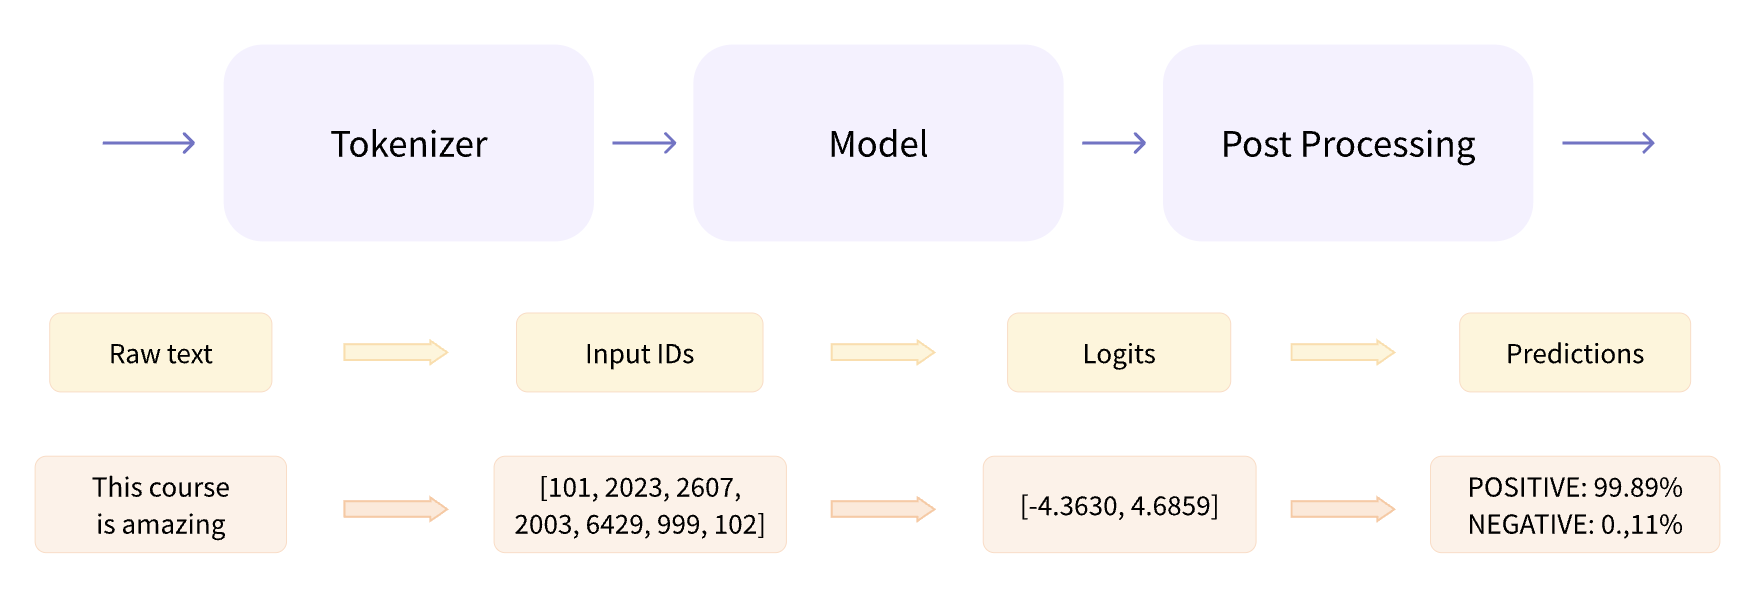

**Tokenization**

When training on image, audio or video data, the data can be passed as pixels into the network. This is different for text. Before the Gradient Descent algorithm can learn something, the text has to be converted into numbers.

This procedure consists of breaking up the text into *tokens*, to map those to *token IDs*, and those to *sentence embeddings*. All this preprocessing needs to be done in exactly the same way as when the model was pretrained.

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Once we have the tokenizer, we can directly pass our sentences to it and we’ll get back a dictionary that’s ready to feed to our model! The only thing left to do is to convert the list of input IDs to *tensors*.


In [ ]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]

# we have to specify return_tensors to use them with PyTorch (pt) or TensorFlow (tf)
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


**Loading model weights and making predictions**

We can download our pretrained model the same way we did with our tokenizer:

In [ ]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

This architecture contains only the base Transformer module: given some inputs, it outputs what we’ll call *hidden states* (also known as features or weights). For each model input, we’ll retrieve a high-dimensional vector representing the contextual understanding of that input by the Transformer model (sentence embedding).

The weights are used as inputs to another part of the model, known as the (prediction) *head*. All of such tasks as questiong answering, translation or text classification will have a different head associated with it.

The embedding output by the Transformer module is usually large. It generally has three dimensions:

- *batch size*: the number of sequences processed at a time
- *sequence length*: the length of the numerical representation of the sequence (number of tokens)
- *hidden size*: the vector representation (sentence embedding) of each token

The hidden size can be very large (768 is common for smaller models, and in larger models this can reach 3072 or more). We can see this if we feed the inputs we preprocessed to our model:

In [ ]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

The outputs of 🤗 Transformers models behave like named tuples or dictionaries.

You can access the elements by attributes or by key (outputs["last_hidden_state"]), or even by index if you know exactly where the thing you are looking for is (outputs[0]).

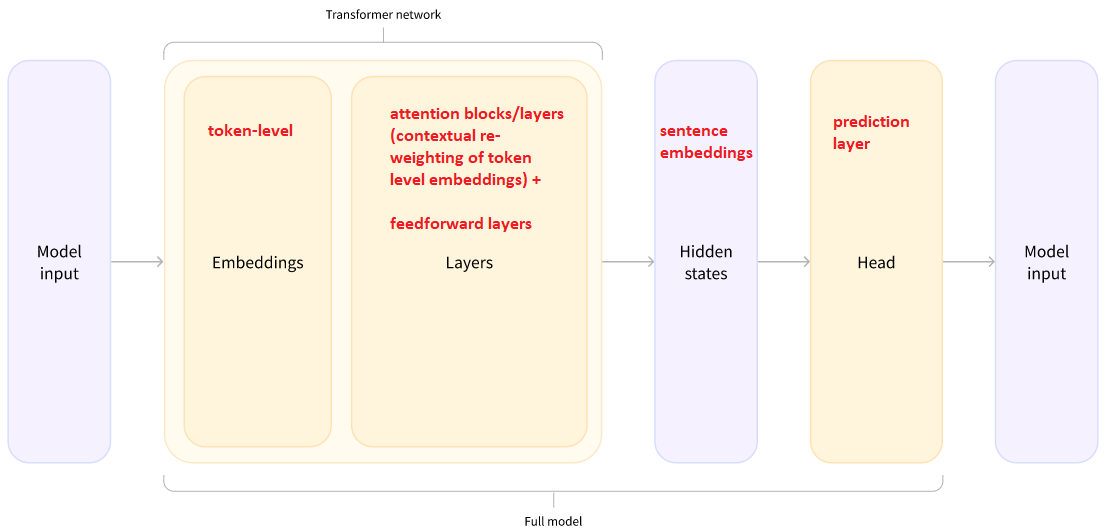

The embeddings layer converts each input ID in the tokenized input into a vector that represents the associated token. The subsequent layers manipulate those vectors using the attention mechanism to produce the final representation of the sentences.

There are many different architectures available in 🤗 Transformers, with each one designed around tackling a specific task. Here is a non-exhaustive list:

- *Model (retrieve the hidden states)
- *ForCausalLM
- *ForMaskedLM
- *ForMultipleChoice
- *ForQuestionAnswering
- *ForSequenceClassification
- *ForTokenClassification

and others 🤗

The *AutoModel* class and all of its relatives are actually simple wrappers over the wide variety of models available in the library. It can automatically guess the appropriate model architecture for your checkpoint, and then instantiates a model with this architecture.

However, if you know the type of model you want to use, you can use the class that defines its architecture directly.

In [ ]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

print(outputs.logits.shape)
print(outputs.logits)

torch.Size([2, 2])
tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


**Post-processing model's output**

The model outputs logits, the raw, unnormalized scores outputted by the last layer of the model. To be converted to probabilities, they need to go through a SoftMax layer (all 🤗 Transformers models output the logits, as the loss function for training will generally fuse the last activation function, such as SoftMax, with the actual loss function, such as cross entropy):

In [ ]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


To get the labels corresponding to each position, we can inspect the id2label attribute of the model config 

In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

**Creating a model from scratch and saving it**

In [ ]:
from transformers import BertConfig, BertModel

# initializing the model config which contains the model parameters
config = BertConfig()

# Building the model from the config
# Model weights are randomly initialized!
model = BertModel(config)

print(config)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



The model can be used in this state, but it will output gibberish as it needs to be trained first. We could now train the model from scratch on the task at hand.

In [ ]:
# saving a model
model.save_pretrained("directory_on_my_computer")

# which savel two files
# config.json pytorch_model.bin

*config.json* contains the attributes necessary to build the model architecture. This file also contains some metadata, such as where the checkpoint originated and what 🤗 Transformers version you were using when you last saved the checkpoint.

The *pytorch_model.bin* file is known as the state dictionary and contains all model’s weights.

# Tokenization and feature extraction 



**Feature extraction**

Before a model can be trained on text, it has to be transferred into numerical representation. The goal is to make a representation which makes sense to the model and is compact.

The first step in the feature extraction process is to break a text sequence into single tokens (*tokenization*). This can be done on the word level (split sequence on spaces and punctuation), the character, and the subword level (split by frequently occuring character sequences) For example: 

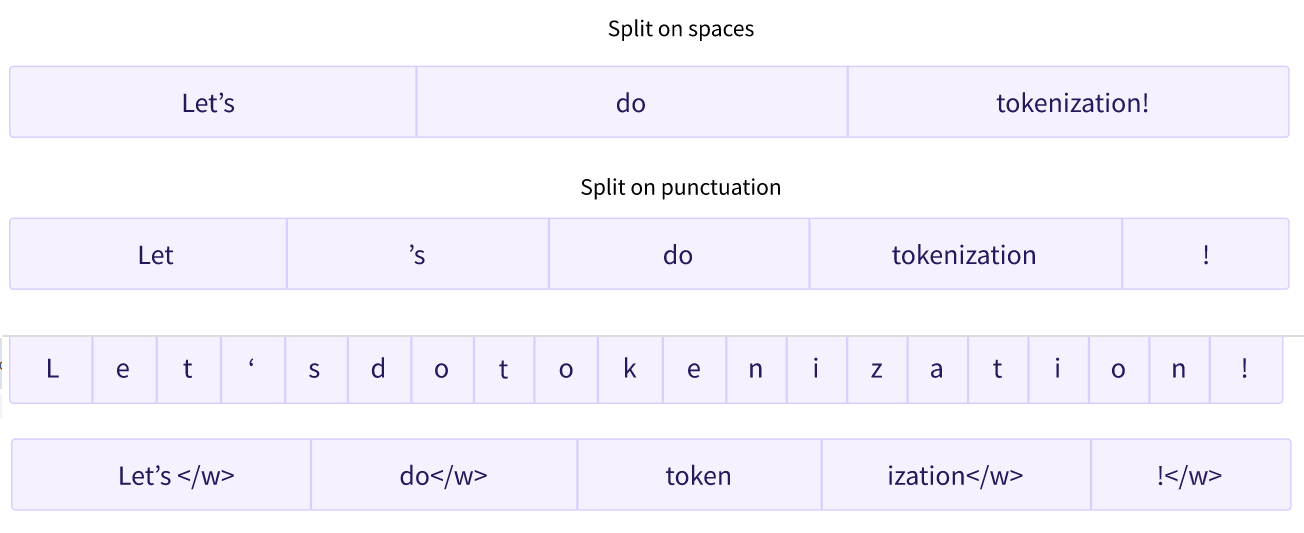

Unsurprisingly, there are many more techniques out there like:

- Byte-level byte-pair encoding (BPE), as used in GPT-2
- WordPiece, as used in BERT
- SentencePiece or Unigram, as used in several multilingual models
- n-gram models

The second step of feature extraction is to count occuriences of all tokens within the whole text corpus or compute word probabilities (called *vectorization*).  Additionally, we can apply *TF-IDF* re-weighting (see https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/) to the token counts to increase the weights for rare words which are assumed to be more distinctive.
Finally, we assign each token a unique vector or a vocabulary ID with which we can access the relevant word embedding (*encoding*).

The two most known classical approaches to feature extraction are the *bag-of-words model* which uses *one-hot* encodings and results in a sparse vector representation of a sentence/document, and the *embedding model* which results in a dense vector representation of tokes/words.

In a bag-of-words model, the vector *x* (representation for a single token - word, stemm, lemma, morphem) is a row vector with the length of the vocabulary size (e.g 40k) with all zeros and a single 1 in a single spot corresponding to the index of the token. That means, that if a sentence consists of 5 tokens, we get a matrix with 5x40k dimensions.

Many of pre-processing steps involved in classical NLP (stop word removal, stemming, lemmatization) are essentially workarounds to deal with shortcomings of sparse feature representation (see overview in https://towardsdatascience.com/text-preprocessing-in-natural-language-processing-using-python-6113ff5decd8).

Word embeddings provide many additional benifits over the sparse representation and can be pre-loaded from other tasks (computed from big corpora), where the embedding layer connects to the first layer of the neural network without an activation function.

For more implementations details on word embeddings see:  
- https://stackabuse.com/implementing-word2vec-with-gensim-library-in-python/ 
- https://towardsdatascience.com/the-three-main-branches-of-word-embeddings-7b90fa36dfb9

Although, people often speak about *neural* embeddings it means that those representations serve as input to neural networks. They are NOT trained by the network iself. Also, wehn we speak about *training*, we simply mean applying tokenization rules of a specific tokenizer to a new text corpus.

BERT introduced *sentence embeddings* in which the word embedding vectors are contextually re-weighted. See the part about Transformer architecture above.

A great comparison article with hands-on demonstrations of classical and latest approaches https://datajenius.com/2022/03/13/a-deep-dive-into-nlp-tokenization-encoding-word-embeddings-sentence-embeddings-word2vec-bert/

**Loading tokenizers**

Loading and saving 🤗 tokenizers is as simple as it is with models. Actually, it’s based on the same two methods: from_pretrained() and save_pretrained(). 

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Similar to AutoModel, the AutoTokenizer class will grab the proper tokenizer class in the library based on the checkpoint name, and can be used directly with any checkpoint:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer("Using a Transformer network is simple")

In [ ]:
# both steps in more detail
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

# encoding
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

# decoding
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']
[7993, 170, 13809, 23763, 2443, 1110, 3014]


**Batching**

During model training or inference, 🤗 Transformers models expect multiple sentences (*batches*) by default.

In [ ]:
# this doesn't work
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

# THIS DOESN'T WORK
tokens = tokenizer.tokenize(sequence) # tokenize
ids = tokenizer.convert_tokens_to_ids(tokens) # encode
input_ids = torch.tensor(ids) # convert to tensor - THE INPUT HAS TO BE A LIST
# This line will fail.
model(input_ids) 

In [ ]:
# it's possible to create a batch consisting of a single sentence
tokens = tokenizer.tokenize(sequence) # tokenize
ids = tokenizer.convert_tokens_to_ids(tokens) # encode
input_ids = torch.tensor([ids]) # NOW INPUT IS A LIST
# This line will fail.
model(input_ids) 

SequenceClassifierOutput([('logits',
                           tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>))])

**Padding, truncating, and attention mask**

Furthermore, we have to keep in mind that all input sequences have to be of the same length. We can ensure this with *padding* or *truncating*.

In [ ]:
# baching is adding all text sequences as lists into a list 
batched_ids = [
    [200, 200, 200],
    [200, 200]
]

# padding
padding_id = 100

batched_ids = [
    [200, 200, 200],
    [200, 200, padding_id],
]


Because the attention layers contextualize each token, these will take into account the padding tokens. This is not what we want. We can fix this by using an *attention mask*.

In [ ]:
sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]

# vs

batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids)).logits)

tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


Attention masks are tensors with the same length as the input IDs tensor, filled with 0s and 1s: 1s let the corresponding tokens take part in the attention computation, and 0s lead the corresponding tokens to be ignored (zeroed out) by the attention layers of the model.

In [ ]:
attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))
print(outputs.logits)

tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


In [ ]:
# you can also truncate your text sequences
max_sequence_length = 512
sequence = sequence[:max_sequence_length]

**Tokenizers can do everything themselves**

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# multiple sequences are ok
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

model_inputs = tokenizer(sequences)

# Will pad the sequences up to the maximum sequence length
model_inputs = tokenizer(sequences, padding="longest")

# Will pad the sequences up to the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, padding="max_length")

# Will pad the sequences up to the specified max length
model_inputs = tokenizer(sequences, padding="max_length", max_length=8)

# Will truncate the sequences that are longer than the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, truncation=True)

# Will truncate the sequences that are longer than the specified max length
model_inputs = tokenizer(sequences, max_length=8, truncation=True)


In [ ]:
# the whole pipeline
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[0.9507, 0.0493],
        [0.7296, 0.2704]], grad_fn=<SoftmaxBackward0>)


**Training a tokenizer on own text data**

https://huggingface.co/course/chapter6/2?fw=pt

In [ ]:
# save your tokenizer to disc
tokenizer.save_pretrained("directory_on_my_computer")

# Fine-tuning a model

**Loading training data**

The 🤗 Datasets library provides a very simple command to download and cache a dataset from the Hub. Let's download the Microsoft Research Paraphrase Corpus (MRPC) dataset like this:

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

As you can see, we get a DatasetDict object which contains the training set, the validation set, and the test set. Each of those contains several columns (sentence1, sentence2, label, and idx) and a variable number of rows, which are the number of elements in each set (so, there are 3,668 pairs of sentences in the training set, 408 in the validation set, and 1,725 in the test set).

In [ ]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]

{'idx': 0,
 'label': 1,
 'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .'}

In [ ]:
raw_train_dataset.features

{'idx': Value(dtype='int32', id=None),
 'label': ClassLabel(num_classes=2, names=['not_equivalent', 'equivalent'], id=None),
 'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None)}

For each training example, we have a sentence pairs (sentence1 and sentence2) and a label with two different classes ('not_equivalent', 'equivalent').

We have to tokenize each sentence pair during pre-processing. For that, we define a function for a single training example:

In [ ]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

In [ ]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Now, we can apply the tokenization function on all our datasets (train, validation, test) at once.

We’re using batched=True in our call to map so the function is applied to multiple elements of our dataset at once, and not on each element separately.

The resulting datasets now contain 'input_ids', 'token_type_ids', and 'attention_mask'. token_type_ids tell the model which is the first and which is the second sentence.

In [ ]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets

Parameter 'function'=<function tokenize_function at 0x7efdec283b00> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

However, the tokenized datasets are not padded to the right shape. Looking at training examples from a single batch (8 examples), they all have different sequence lenghts:

In [ ]:
samples = tokenized_datasets["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]}
[len(x) for x in samples["input_ids"]]

[50, 59, 47, 67, 59, 50, 62, 32]

**Training**

The function that is responsible for putting together samples inside a batch is called a *collate function*. It’s an argument you can pass when you build a DataLoader, the default being a function that will just convert your samples to PyTorch tensors and concatenate them.

During batching, we can apply padding as necessary on each batch and avoid having over-long inputs with a lot of padding. This will speed up training by quite a bit, but note that if you’re training on a TPU it can cause problems — TPUs prefer fixed shapes, even when that requires extra padding.

For this, the 🤗 Transformers library provides us with such a function via *DataCollatorWithPadding*.

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

*Dynamic padding* means the samples in the investigated batch should all be padded to a length of 67, the maximum length inside the batch. 

In [ ]:
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

{'attention_mask': torch.Size([8, 67]),
 'input_ids': torch.Size([8, 67]),
 'labels': torch.Size([8]),
 'token_type_ids': torch.Size([8, 67])}

🤗 Transformers provides a Trainer class to help you fine-tune any of the pretrained models it provides on your dataset. Once you’ve done all the data preprocessing work in the last section, you have just a few steps left to define the Trainer.

The first step before we can define our Trainer is to define a TrainingArguments class that will contain all the hyperparameters the Trainer will use for training and evaluation. The only argument you have to provide is a directory where the trained model will be saved, as well as the checkpoints along the way. For all the rest, you can leave the defaults, which should work pretty well for a basic fine-tuning.

If you want to automatically upload your model to the Hub during training, pass along push_to_hub=True in the TrainingArguments. 

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

You will get a warning after instantiating this pretrained model. This is because BERT has not been pretrained on classifying pairs of sentences, so the head of the pretrained model has been discarded and a new head suitable for sequence classification has been added instead.

The warnings indicate that some weights were not used (the ones corresponding to the dropped pretraining head) and that some others were randomly initialized (the ones for the new head).

We can define a Trainer by passing it all the objects constructed up to now — the *model*, the *training_args*, the training and validation *datasets*, our *data_collator*, and our *tokenizer*:

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

To fine-tune the model on our dataset, we just have to call the train() method of our Trainer. However, we should also provide it with a evaluation_strategy (evaluate on each step or epoch) and compute_metrics.

In [ ]:
trainer.train()

**Evaluation**

In [ ]:
# to extract predictions on the validation set
predictions = trainer.predict(tokenized_datasets["validation"])

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, sentence2, idx. If sentence1, sentence2, idx are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 408
  Batch size = 8


In [ ]:
import numpy as np

# get max values
#preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
from datasets import load_metric

# compare prediction to the labels to get accuracy and F1 score
metric = load_metric("glue", "mrpc") # using GLUE benchmark
#metric.compute(predictions=preds, references=predictions.label_ids)

In [ ]:
# wrapped as a function
def compute_metrics(eval_preds):
    metric = load_metric("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
# set the evaluation strategy in training_args
training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")

# and pass the compute_metrics function to the Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
# launch the training
trainer.train()


The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2. If idx, sentence1, sentence2 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 3668
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1377


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.484822,0.845588,0.886486
2,0.318200,0.734006,0.833333,0.884354
3,0.143600,0.734006,0.833333,0.884354


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2. If idx, sentence1, sentence2 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 408
  Batch size = 8


Epoch,Training Loss,Validation Loss


Saving model checkpoint to test-trainer/checkpoint-500
Configuration saved in test-trainer/checkpoint-500/config.json
Model weights saved in test-trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2. If idx, sentence1, sentence2 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 408
  Batch size = 8
Saving model checkpoint to test-trainer/checkpoint-1000
Configuration saved in test-trainer/checkpoint-1000/config.json
Model weights saved in test-trainer/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-1000/tokenizer_config.json
Special to

TrainOutput(global_step=1377, training_loss=0.19160677508850762, metrics={'train_runtime': 207.73, 'train_samples_per_second': 52.973, 'train_steps_per_second': 6.629, 'total_flos': 540800107631040.0, 'train_loss': 0.19160677508850762, 'epoch': 3.0})

You can also train using PyTorch's low-level training loop: https://huggingface.co/course/chapter3/4?fw=pt

# Creating an own dataset

**Loading local files**

🤗 Datasets provides loading scripts to handle the loading of local and remote datasets. It supports several common data formats, such as:

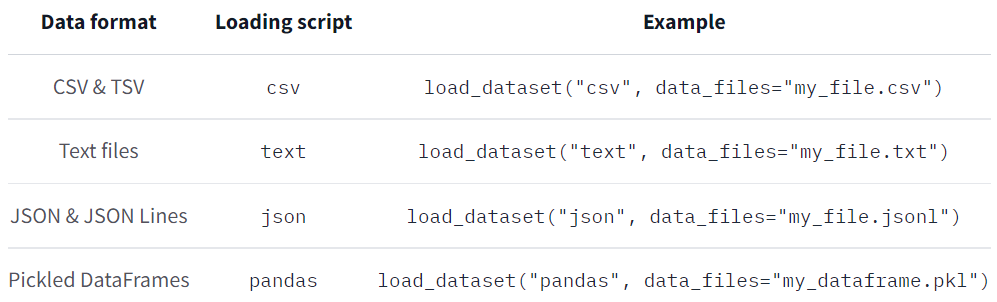

For this example we’ll use the SQuAD-it dataset, which is a large-scale dataset for question answering in Italian.

The training and test splits are hosted on GitHub, so we can download them with a simple wget command:

In [ ]:
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-test.json.gz

# uncompress
!gzip -dkv SQuAD_it-*.json.gz

--2022-07-06 09:39:06--  https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/crux82/squad-it/master/SQuAD_it-train.json.gz [following]
--2022-07-06 09:39:07--  https://raw.githubusercontent.com/crux82/squad-it/master/SQuAD_it-train.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7725286 (7.4M) [application/octet-stream]
Saving to: ‘SQuAD_it-train.json.gz’

SQuAD_it-train.json 100%[===================>]   7.37M  --.-KB/s    in 0.06s   

2022-07-06 09:39:07 (134 MB/s) - ‘SQuAD_it-train.json.gz’ saved [7725286/7725286]

--

To load a JSON file with the load_dataset() function, we just need to know if we’re dealing with ordinary JSON (similar to a nested dictionary) or JSON Lines (line-separated JSON). Like many question answering datasets, SQuAD-it uses the nested format, with all the text stored in a data field. 

In [ ]:
from datasets import load_dataset

squad_it_dataset = load_dataset("json", data_files="SQuAD_it-train.json", field="data")
squad_it_dataset

Using custom data configuration default-f472f0d9e7e38d24
Reusing dataset json (/root/.cache/huggingface/datasets/json/default-f472f0d9e7e38d24/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
})

In [ ]:
squad_it_dataset["train"][0]

However, what we really want is to include both the train and test splits in a single *DatasetDict* object so we can apply *Dataset.map()* functions across both splits at once. To do this, we can provide a dictionary to the *data_files* argument that maps each split name to a file associated with that split:

In [ ]:
data_files = {"train": "SQuAD_it-train.json", "test": "SQuAD_it-test.json"}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")
squad_it_dataset

Using custom data configuration default-b6f62e623343e83b


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-b6f62e623343e83b/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
    test: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 48
    })
})

The data_files argument of the load_dataset() function is quite flexible and can be either a single file path, a list of file paths, or a dictionary that maps split names to file paths. You can also glob files that match a specified pattern according to the rules used by the Unix shell (e.g., you can glob all the JSON files in a directory as a single split by setting data_files="*.json"). See https://huggingface.co/docs/datasets/loading#local-and-remote-files

The loading scripts in 🤗 Datasets actually support automatic decompression of the input files, so we could have skipped the use of gzip by pointing the data_files argument directly to the compressed files:

In [ ]:
data_files = {"train": "SQuAD_it-train.json.gz", "test": "SQuAD_it-test.json.gz"}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")
squad_it_dataset

Using custom data configuration default-1b68efd983f96a39
Reusing dataset json (/root/.cache/huggingface/datasets/json/default-1b68efd983f96a39/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
    test: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 48
    })
})

**Loading remote files**

Actually, you can skip manual download all together:

In [ ]:
url = "https://github.com/crux82/squad-it/raw/master/"
data_files = {
    "train": url + "SQuAD_it-train.json.gz",
    "test": url + "SQuAD_it-test.json.gz",
}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")
squad_it_dataset

Using custom data configuration default-b2375dfabd7ba663


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-b2375dfabd7ba663/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
    test: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 48
    })
})

**Data slicing**

Similar to Pandas, 🤗 Datasets provides several functions to manipulate the contents of Dataset and DatasetDict objects. 

For this example we’ll use the Drug Review Dataset that’s hosted on the UC Irvine Machine Learning Repository, which contains patient reviews on various drugs, along with the condition being treated and a 10-star rating of the patient’s satisfaction.

In [ ]:
# the date is not packed into different files for training and testing
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip"
!unzip drugsCom_raw.zip

from datasets import load_dataset

data_files = {"train": "drugsComTrain_raw.tsv", "test": "drugsComTest_raw.tsv"}
# \t is the tab character in Python
drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")
drug_dataset


--2022-07-06 09:50:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/x-httpd-php]
Saving to: ‘drugsCom_raw.zip.1’

drugsCom_raw.zip.1  100%[===================>]  41.00M  69.3MB/s    in 0.6s    

2022-07-06 09:50:56 (69.3 MB/s) - ‘drugsCom_raw.zip.1’ saved [42989872/42989872]

Archive:  drugsCom_raw.zip
replace drugsComTest_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: drugsComTest_raw.tsv    
replace drugsComTrain_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: drugsComTrain_raw.tsv   


Using custom data configuration default-3761173c276c0a9a
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-3761173c276c0a9a/0.0.0/51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 161297
    })
    test: Dataset({
        features: ['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 53766
    })
})

Grab a small random subset to examine dataset's contents:

In [ ]:
drug_sample = drug_dataset["train"].shuffle(seed=42).select(range(1000))
# Peek at the first few examples
drug_sample[:3]

{'Unnamed: 0': [87571, 178045, 80482],
 'condition': ['Gout, Acute', 'ibromyalgia', 'Inflammatory Conditions'],
 'date': ['September 2, 2015', 'November 7, 2011', 'June 5, 2013'],
 'drugName': ['Naproxen', 'Duloxetine', 'Mobic'],
 'rating': [9.0, 3.0, 10.0],
 'review': ['"like the previous person mention, I&#039;m a strong believer of aleve, it works faster for my gout than the prescription meds I take. No more going to the doctor for refills.....Aleve works!"',
  '"I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than t

Dataset.select() expects an iterable of indices, so we’ve passed range(1000) to grab the first 1,000 examples from the shuffled dataset.

From this sample we can already see a few quirks in our dataset:

- The Unnamed: 0 column looks suspiciously like an anonymized ID for each patient.
- The condition column includes a mix of uppercase and lowercase labels.
- The reviews are of varying length and contain a mix of Python line separators (\r\n) as well as HTML character codes like &\#039;.

Hre are the solutions for each for those problems:

In [ ]:
for split in drug_dataset.keys():
    assert len(drug_dataset[split]) == len(drug_dataset[split].unique("Unnamed: 0"))

In [ ]:
# renaming a column
drug_dataset = drug_dataset.rename_column(
    original_column_name="Unnamed: 0", new_column_name="patient_id"
)
drug_dataset

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 161297
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 53766
    })
})

In [ ]:
# creating a filter function for rows with None values in the condition column
# apply filtering using a lambda function
drug_dataset = drug_dataset.filter(lambda x: x["condition"] is not None)

  0%|          | 0/162 [00:00<?, ?ba/s]

  0%|          | 0/54 [00:00<?, ?ba/s]

In [ ]:
# creating a lowercasing function for the condition column
def lowercase_condition(example):
    return {"condition": example["condition"].lower()} # value from condition column is lowercased and saved in the condition column


In [ ]:
# applying the lowercase function
drug_dataset = drug_dataset.map(lowercase_condition)
# Check that lowercasing worked
drug_dataset["train"]["condition"][:3]

  0%|          | 0/160398 [00:00<?, ?ex/s]

  0%|          | 0/53471 [00:00<?, ?ex/s]

['left ventricular dysfunction', 'adhd', 'birth control']

In [ ]:
# function that checks the length of each review
def compute_review_length(example):
    return {"review_length": len(example["review"].split())} # length of each review is returned under the name review_length

Unlike our lowercase_condition() function, compute_review_length() returns a dictionary whose key does not correspond to one of the column names in the dataset. In this case, when compute_review_length() is passed to Dataset.map(), it will be applied to all the rows in the dataset to create a new review_length column:

In [ ]:
drug_dataset = drug_dataset.map(compute_review_length)
# Inspect the first training example
drug_dataset["train"][0]

  0%|          | 0/160398 [00:00<?, ?ex/s]

  0%|          | 0/53471 [00:00<?, ?ex/s]

{'condition': 'left ventricular dysfunction',
 'date': 'May 20, 2012',
 'drugName': 'Valsartan',
 'patient_id': 206461,
 'rating': 9.0,
 'review': '"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
 'review_length': 17,
 'usefulCount': 27}

An alternative way to add new columns to a dataset is with the Dataset.add_column() function. This allows you to provide the column as a Python list or NumPy array and can be handy in situations where Dataset.map() is not well suited for your analysis.

In [ ]:
drug_dataset["train"].sort("review_length")[:3]

{'condition': ['birth control', 'muscle spasm', 'pain'],
 'date': ['November 4, 2008', 'March 24, 2017', 'August 20, 2016'],
 'drugName': ['Loestrin 21 1 / 20', 'Chlorzoxazone', 'Nucynta'],
 'patient_id': [103488, 23627, 20558],
 'rating': [10.0, 1.0, 6.0],
 'review': ['"Excellent."', '"useless"', '"ok"'],
 'review_length': [1, 1, 1],
 'usefulCount': [5, 2, 10]}

As we suspected, some reviews contain just a single word, which, although it may be okay for sentiment analysis, would not be informative if we want to predict the condition.

In [ ]:
# this removes around 15% of the reviews from the original training set
drug_dataset = drug_dataset.filter(lambda x: x["review_length"] > 30)
print(drug_dataset.num_rows)

  0%|          | 0/161 [00:00<?, ?ba/s]

  0%|          | 0/54 [00:00<?, ?ba/s]

{'train': 138514, 'test': 46108}


In [ ]:
# escape HTML
import html

drug_dataset = drug_dataset.map(lambda x: {"review": html.unescape(x["review"])})

  0%|          | 0/138514 [00:00<?, ?ex/s]

  0%|          | 0/46108 [00:00<?, ?ex/s]

In [ ]:
# batched (faster) version
new_drug_dataset = drug_dataset.map(
    lambda x: {"review": [html.unescape(o) for o in x["review"]]}, batched=True
)

  0%|          | 0/139 [00:00<?, ?ba/s]

  0%|          | 0/47 [00:00<?, ?ba/s]

**Converting Datsets to other formats**

To enable the conversion between various third-party libraries, 🤗 Datasets provides a Dataset.set_format() function. This function only changes the output format of the dataset, so you can easily switch to another format without affecting the underlying data format, which is Apache Arrow. 

In [ ]:
drug_dataset.set_format("pandas")
drug_dataset["train"][:3]

,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
0,95260,Guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,141
1,92703,Lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,134
2,138000,Ortho Evra,birth control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,89


Under the hood, Dataset.set_format() changes the return format for the dataset’s __getitem__() dunder method. This means that when we want to create a new object like train_df from a Dataset in the "pandas" format, we need to slice the whole dataset to obtain a pandas.DataFrame. You can verify for yourself that the type of drug_dataset["train"] is Dataset, irrespective of the output format.

In [ ]:
train_df = drug_dataset["train"][:]

In [ ]:
frequencies = (
    train_df["condition"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "condition", "condition": "frequency"})
)
frequencies.head()

,condition,frequency
0,birth control,27655
1,depression,8023
2,acne,5209
3,anxiety,4991
4,pain,4744


In [ ]:
# converting the frequencies dataframe to a dataset
from datasets import Dataset

freq_dataset = Dataset.from_pandas(frequencies)
freq_dataset

Dataset({
    features: ['condition', 'frequency'],
    num_rows: 819
})

In [ ]:
drug_dataset.reset_format()

**Creating validation data from training data**

🤗 Datasets provides a Dataset.train_test_split() function that is based on the famous functionality from scikit-learn.

In [ ]:
drug_dataset_clean = drug_dataset["train"].train_test_split(train_size=0.8, seed=42)
# Rename the default "test" split to "validation"
drug_dataset_clean["validation"] = drug_dataset_clean.pop("test")
# Add the "test" set to our `DatasetDict`
drug_dataset_clean["test"] = drug_dataset["test"]
drug_dataset_clean

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 110811
    })
    validation: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 27703
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 46108
    })
})

🤗 Datasets provides three main functions to save your dataset in different formats:

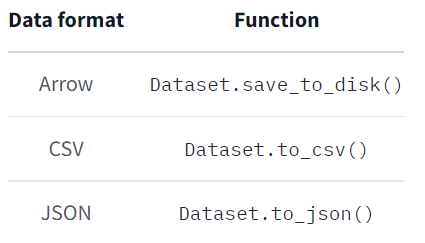

In [ ]:
drug_dataset_clean.save_to_disk("drug-reviews")

Flattening the indices:   0%|          | 0/111 [00:00<?, ?ba/s]

Flattening the indices:   0%|          | 0/28 [00:00<?, ?ba/s]

This will create a directory with the following structure:

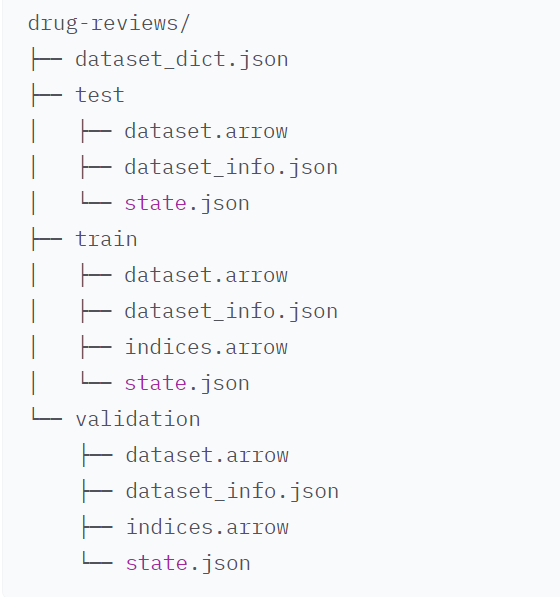

where we can see that each split is associated with its own dataset.arrow table, and some metadata in dataset_info.json and state.json. You can think of the Arrow format as a fancy table of columns and rows that is optimized for building high-performance applications that process and transport large datasets.

Once the dataset is saved, we can load it by using the load_from_disk() function as follows:

In [ ]:
from datasets import load_from_disk

drug_dataset_reloaded = load_from_disk("drug-reviews")
drug_dataset_reloaded

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 110811
    })
    validation: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 27703
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 46108
    })
})

For the CSV and JSON formats, we have to store each split as a separate file.

In [ ]:
for split, dataset in drug_dataset_clean.items():
    dataset.to_json(f"drug-reviews-{split}.jsonl")

Creating json from Arrow format:   0%|          | 0/12 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

This saves each split in JSON Lines format, where each row in the dataset is stored as a single line of JSON. Here’s what the first example looks like:

In [ ]:
!head -n 1 drug-reviews-train.jsonl

{"patient_id":89879,"drugName":"Cyclosporine","condition":"keratoconjunctivitis sicca","review":"\"I have used Restasis for about a year now and have seen almost no progress.  For most of my life I've had red and bothersome eyes. After trying various eye drops, my doctor recommended Restasis.  He said it typically takes 3 to 6 months for it to really kick in but it never did kick in.  When I put the drops in it burns my eyes for the first 30 - 40 minutes.  I've talked with my doctor about this and he said it is normal but should go away after some time, but it hasn't. Every year around spring time my eyes get terrible irritated  and this year has been the same (maybe even worse than other years) even though I've been using Restasis for a year now. The only difference I notice was for the first couple weeks, but now I'm ready to move on.\"","rating":2.0,"date":"April 20, 2013","usefulCount":69,"review_length":147}


In [ ]:
data_files = {
    "train": "drug-reviews-train.jsonl",
    "validation": "drug-reviews-validation.jsonl",
    "test": "drug-reviews-test.jsonl",
}
drug_dataset_reloaded = load_dataset("json", data_files=data_files)

Using custom data configuration default-0c01123b7995b7a0


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-0c01123b7995b7a0/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

**Dealing with Big Data**

See https://huggingface.co/course/chapter5/4?fw=pt

**Scraping data from the web using APIs**

https://huggingface.co/course/chapter5/5?fw=pt

# NLP tasks

https://huggingface.co/course/chapter7/1?fw=pt

**Semantic search with FAISS**

https://huggingface.co/course/chapter5/6?fw=pt

language identification: bag of letter-bigrams encoding detection: bag of byte-bigrams topic classification: bag-of-words/TF-IDF bag-of-words authorship contribution: bag-of-part of speech-tags and bag of function words/ngrams, density of function words (stylistic properties) sequence tagging tasks (POS, NER): distributional information, suffixes language modelling (punctuation correction, text segmentation, diacritization)

https://github.com/NielsRogge/Transformers-Tutorials

# Tools

**Gradio**

https://huggingface.co/course/chapter9/1?fw=pt

**Huggingface on AWS**
- https://docs.aws.amazon.com/sagemaker/latest/dg/hugging-face.html

**Tutorials**

https://github.com/NielsRogge/Transformers-Tutorials